# HW1
This homework is about Playing with **Numpy, Pandas** and **Matplotlib**.

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing Dataset into a dataframe
For this part I used read_csv function which gets path of the dataset and the column to use as index and returns a dataframe.

In [2]:
df = pd.read_csv('dataset/HW1_Dataset.csv',index_col=0)
df.head()
df.set_index('CCA3',inplace = True)

## Finding more information about the dataset
we can get information like how many columns this dataset has and their data type and ... by easily calling info() function :).

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 234 entries, BN to LI
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        234 non-null    object
 1   2022        234 non-null    int64 
 2   2020        234 non-null    int64 
 3   2015        234 non-null    int64 
 4   2010        234 non-null    int64 
 5   2000        234 non-null    int64 
 6   1990        234 non-null    int64 
 7   1980        234 non-null    int64 
 8   1970        234 non-null    int64 
 9   Area (km²)  234 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 20.1+ KB


## Converting the population in df to real data

In [4]:
df.loc[:,'2022':'1970'] = df.loc[:,'2022':'1970'] * 1000

## 1.1 Find the Density by using 2022's column and Area's column
We simply divide the columns
and put the result in a new column. 

In [5]:
df['Density'] = df['2022'] / df['Area (km²)']
df

,Name,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),Density
CCA3,,,,,,,,,,,
BN,Brunei,449000,442000,421000,396000,334000,262000,188000,133000,5765,77.883781
JE,Jersey,111000,108000,101000,96000,86000,83000,75000,68000,116,956.896552
VN,Vietnam,98187000,96649000,92191000,87411000,79001000,66913000,52968000,41929000,331212,296.447592
JP,Japan,123952000,125245000,127251000,128105000,126804000,123686000,117624000,105417000,377930,327.976080
IS,Iceland,373000,367000,331000,318000,281000,255000,228000,204000,103000,3.621359
...,...,...,...,...,...,...,...,...,...,...,...
LU,Luxembourg,648000,630000,569000,507000,436000,381000,364000,339000,2586,250.580046
BJ,Benin,13353000,12643000,10933000,9446000,6998000,5133000,3834000,3023000,112622,118.564756
KP,North Korea,26069000,25867000,25258000,24686000,23367000,20800000,17974000,14997000,120538,216.272047


## 1.2 Find the average population of each contry in history
First we use loc attribute to get the columns which shows population of each country in the specified years and then we use mean function which uses the values in each column/row and returns their mean and because we used axis = 1 it will be calculated for the values in each row.

In [6]:
df['mean_population_in_history'] = df.loc[:,'2022':'1970'].mean(axis=1)
df

,Name,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),Density,mean_population_in_history
CCA3,,,,,,,,,,,,
BN,Brunei,449000,442000,421000,396000,334000,262000,188000,133000,5765,77.883781,328125.0
JE,Jersey,111000,108000,101000,96000,86000,83000,75000,68000,116,956.896552,91000.0
VN,Vietnam,98187000,96649000,92191000,87411000,79001000,66913000,52968000,41929000,331212,296.447592,76906125.0
JP,Japan,123952000,125245000,127251000,128105000,126804000,123686000,117624000,105417000,377930,327.976080,122260500.0
IS,Iceland,373000,367000,331000,318000,281000,255000,228000,204000,103000,3.621359,294625.0
...,...,...,...,...,...,...,...,...,...,...,...,...
LU,Luxembourg,648000,630000,569000,507000,436000,381000,364000,339000,2586,250.580046,484250.0
BJ,Benin,13353000,12643000,10933000,9446000,6998000,5133000,3834000,3023000,112622,118.564756,8170375.0
KP,North Korea,26069000,25867000,25258000,24686000,23367000,20800000,17974000,14997000,120538,216.272047,22377250.0


## 1.3 Find the percentages of the world's population for each country in the specified years
1. First we use loc attribute to get the columns which shows population of each country in the specified years and then we use sum function which uses the values in each column/row and returns their sum and because we used axis = 0 it will be calculated for the values in each column.
2. Then we simply devide the dataframes and I think python will use broadcasting on the second operand to have the same shape and then devide each entry by it's corresponding value in the other DF.
3. After that we will change the name of the columns.
4. And lastly we will use join function(which is like join function in database) to add the values.

In [7]:
percentages = ((df.loc[:,'2022':'1970'] / df.loc[:,'2022':'1970'].sum(axis=0)) *100)
percentages.columns = ['2022_percentage_of_world', '2020_percentage_of_world', '2015_percentage_of_world', '2010_percentage_of_world', '2000_percentage_of_world', '1990_percentage_of_world', '1980_percentage_of_world', '1970_percentage_of_world']
df = df.join(percentages)
df

,Name,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),Density,mean_population_in_history,2022_percentage_of_world,2020_percentage_of_world,2015_percentage_of_world,2010_percentage_of_world,2000_percentage_of_world,1990_percentage_of_world,1980_percentage_of_world,1970_percentage_of_world
CCA3,,,,,,,,,,,,,,,,,,,,
BN,Brunei,449000,442000,421000,396000,334000,262000,188000,133000,5765,77.883781,328125.0,0.005631,0.005638,0.005670,0.005670,0.005433,0.004930,0.004232,0.003600
JE,Jersey,111000,108000,101000,96000,86000,83000,75000,68000,116,956.896552,91000.0,0.001392,0.001378,0.001360,0.001375,0.001399,0.001562,0.001688,0.001841
VN,Vietnam,98187000,96649000,92191000,87411000,79001000,66913000,52968000,41929000,331212,296.447592,76906125.0,1.231430,1.232885,1.241662,1.251628,1.285185,1.259137,1.192327,1.135017
JP,Japan,123952000,125245000,127251000,128105000,126804000,123686000,117624000,105417000,377930,327.976080,122260500.0,1.554566,1.597665,1.713862,1.834321,2.062841,2.327464,2.647754,2.853636
IS,Iceland,373000,367000,331000,318000,281000,255000,228000,204000,103000,3.621359,294625.0,0.004678,0.004682,0.004458,0.004553,0.004571,0.004798,0.005132,0.005522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LU,Luxembourg,648000,630000,569000,507000,436000,381000,364000,339000,2586,250.580046,484250.0,0.008127,0.008036,0.007663,0.007260,0.007093,0.007169,0.008194,0.009177
BJ,Benin,13353000,12643000,10933000,9446000,6998000,5133000,3834000,3023000,112622,118.564756,8170375.0,0.167469,0.161278,0.147250,0.135256,0.113843,0.096590,0.086305,0.081833
KP,North Korea,26069000,25867000,25258000,24686000,23367000,20800000,17974000,14997000,120538,216.272047,22377250.0,0.326949,0.329968,0.340184,0.353476,0.380133,0.391404,0.404600,0.405968


## 1.4 Find growth rate by deviding 2022's population by 2020's population

In [8]:
df['growth_rate'] = df.loc[:,'2022'] / df.loc[:,'2020']
df

,Name,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),...,mean_population_in_history,2022_percentage_of_world,2020_percentage_of_world,2015_percentage_of_world,2010_percentage_of_world,2000_percentage_of_world,1990_percentage_of_world,1980_percentage_of_world,1970_percentage_of_world,growth_rate
CCA3,,,,,,,,,,,,,,,,,,,,,
BN,Brunei,449000,442000,421000,396000,334000,262000,188000,133000,5765,...,328125.0,0.005631,0.005638,0.005670,0.005670,0.005433,0.004930,0.004232,0.003600,1.015837
JE,Jersey,111000,108000,101000,96000,86000,83000,75000,68000,116,...,91000.0,0.001392,0.001378,0.001360,0.001375,0.001399,0.001562,0.001688,0.001841,1.027778
VN,Vietnam,98187000,96649000,92191000,87411000,79001000,66913000,52968000,41929000,331212,...,76906125.0,1.231430,1.232885,1.241662,1.251628,1.285185,1.259137,1.192327,1.135017,1.015913
JP,Japan,123952000,125245000,127251000,128105000,126804000,123686000,117624000,105417000,377930,...,122260500.0,1.554566,1.597665,1.713862,1.834321,2.062841,2.327464,2.647754,2.853636,0.989676
IS,Iceland,373000,367000,331000,318000,281000,255000,228000,204000,103000,...,294625.0,0.004678,0.004682,0.004458,0.004553,0.004571,0.004798,0.005132,0.005522,1.016349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LU,Luxembourg,648000,630000,569000,507000,436000,381000,364000,339000,2586,...,484250.0,0.008127,0.008036,0.007663,0.007260,0.007093,0.007169,0.008194,0.009177,1.028571
BJ,Benin,13353000,12643000,10933000,9446000,6998000,5133000,3834000,3023000,112622,...,8170375.0,0.167469,0.161278,0.147250,0.135256,0.113843,0.096590,0.086305,0.081833,1.056158
KP,North Korea,26069000,25867000,25258000,24686000,23367000,20800000,17974000,14997000,120538,...,22377250.0,0.326949,0.329968,0.340184,0.353476,0.380133,0.391404,0.404600,0.405968,1.007809


## 1.5 Sort by percentage of the world population 
I used sort_values function and passed the column which I want the Df to be sorted by and the order by specifing ascending variable.

In [9]:
df = df.sort_values('2022_percentage_of_world',ascending=False)
df

,Name,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),...,mean_population_in_history,2022_percentage_of_world,2020_percentage_of_world,2015_percentage_of_world,2010_percentage_of_world,2000_percentage_of_world,1990_percentage_of_world,1980_percentage_of_world,1970_percentage_of_world,growth_rate
CCA3,,,,,,,,,,,,,,,,,,,,,
CN,China,1425887000,1424930000,1393715000,1348191000,1264099000,1153704000,982372000,822534000,9706961,...,1.226929e+09,17.883019,18.176855,18.771058,19.304595,20.564303,21.709850,22.113507,22.265979,1.000672
IN,India,1417173000,1396387000,1322867000,1240614000,1059634000,870452000,696828000,557501000,3287590,...,1.070182e+09,17.773731,17.812751,17.816851,17.764212,17.238076,16.379750,15.685821,15.091541,1.014886
US,United States,338290000,335942000,324608000,311183000,282399000,248084000,223140000,200328000,9372610,...,2.829968e+08,4.242725,4.285382,4.371938,4.455794,4.594054,4.668326,5.022953,5.422875,1.006989
ID,Indonesia,275501000,271858000,259092000,244016000,214072000,182160000,148177000,115228000,1904569,...,2.137630e+08,3.455246,3.467906,3.489545,3.494038,3.482513,3.427800,3.335512,3.119220,1.013400
PK,Pakistan,235825000,227197000,210969000,194454000,154370000,115414000,80624000,59291000,881912,...,1.597680e+08,2.957642,2.898196,2.841407,2.784365,2.511284,2.171805,1.814872,1.605006,1.037976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FK,Falkland Islands,4000,4000,3000,3000,3000,2000,2000,2000,12173,...,2.875000e+03,0.000050,0.000051,0.000040,0.000043,0.000049,0.000038,0.000045,0.000054,1.000000
MS,Montserrat,4000,5000,5000,5000,5000,11000,11000,11000,102,...,7.125000e+03,0.000050,0.000064,0.000067,0.000072,0.000081,0.000207,0.000248,0.000298,0.800000
NU,Niue,2000,2000,2000,2000,2000,3000,4000,5000,260,...,2.750000e+03,0.000025,0.000026,0.000027,0.000029,0.000033,0.000056,0.000090,0.000135,1.000000


## 1.6 give each country a rank
I used np.arange which returns back an array which it's start(1) and stop(df.shape[0]) are specified by the arguments.

In [10]:
df['Rank'] = np.arange(1,df.shape[0]+1)
df

,Name,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),...,2022_percentage_of_world,2020_percentage_of_world,2015_percentage_of_world,2010_percentage_of_world,2000_percentage_of_world,1990_percentage_of_world,1980_percentage_of_world,1970_percentage_of_world,growth_rate,Rank
CCA3,,,,,,,,,,,,,,,,,,,,,
CN,China,1425887000,1424930000,1393715000,1348191000,1264099000,1153704000,982372000,822534000,9706961,...,17.883019,18.176855,18.771058,19.304595,20.564303,21.709850,22.113507,22.265979,1.000672,1
IN,India,1417173000,1396387000,1322867000,1240614000,1059634000,870452000,696828000,557501000,3287590,...,17.773731,17.812751,17.816851,17.764212,17.238076,16.379750,15.685821,15.091541,1.014886,2
US,United States,338290000,335942000,324608000,311183000,282399000,248084000,223140000,200328000,9372610,...,4.242725,4.285382,4.371938,4.455794,4.594054,4.668326,5.022953,5.422875,1.006989,3
ID,Indonesia,275501000,271858000,259092000,244016000,214072000,182160000,148177000,115228000,1904569,...,3.455246,3.467906,3.489545,3.494038,3.482513,3.427800,3.335512,3.119220,1.013400,4
PK,Pakistan,235825000,227197000,210969000,194454000,154370000,115414000,80624000,59291000,881912,...,2.957642,2.898196,2.841407,2.784365,2.511284,2.171805,1.814872,1.605006,1.037976,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FK,Falkland Islands,4000,4000,3000,3000,3000,2000,2000,2000,12173,...,0.000050,0.000051,0.000040,0.000043,0.000049,0.000038,0.000045,0.000054,1.000000,230
MS,Montserrat,4000,5000,5000,5000,5000,11000,11000,11000,102,...,0.000050,0.000064,0.000067,0.000072,0.000081,0.000207,0.000248,0.000298,0.800000,231
NU,Niue,2000,2000,2000,2000,2000,3000,4000,5000,260,...,0.000025,0.000026,0.000027,0.000029,0.000033,0.000056,0.000090,0.000135,1.000000,232


## 1.7 Find the countries with more than 300M people
1. First I implemented a function called cmp_300 which compares the value of the df element by 300M and returns the corresponding string.
2. Simply call apply function on 2022 column with cmp_300 as it's argument.

In [11]:
def cmp_300(population):
    return 'more than 300' if population > 300000000 else 'less than 300'

In [12]:
df['binary population class'] = df['2022'].apply(cmp_300)
df

,Name,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),...,2020_percentage_of_world,2015_percentage_of_world,2010_percentage_of_world,2000_percentage_of_world,1990_percentage_of_world,1980_percentage_of_world,1970_percentage_of_world,growth_rate,Rank,binary population class
CCA3,,,,,,,,,,,,,,,,,,,,,
CN,China,1425887000,1424930000,1393715000,1348191000,1264099000,1153704000,982372000,822534000,9706961,...,18.176855,18.771058,19.304595,20.564303,21.709850,22.113507,22.265979,1.000672,1,more than 300
IN,India,1417173000,1396387000,1322867000,1240614000,1059634000,870452000,696828000,557501000,3287590,...,17.812751,17.816851,17.764212,17.238076,16.379750,15.685821,15.091541,1.014886,2,more than 300
US,United States,338290000,335942000,324608000,311183000,282399000,248084000,223140000,200328000,9372610,...,4.285382,4.371938,4.455794,4.594054,4.668326,5.022953,5.422875,1.006989,3,more than 300
ID,Indonesia,275501000,271858000,259092000,244016000,214072000,182160000,148177000,115228000,1904569,...,3.467906,3.489545,3.494038,3.482513,3.427800,3.335512,3.119220,1.013400,4,less than 300
PK,Pakistan,235825000,227197000,210969000,194454000,154370000,115414000,80624000,59291000,881912,...,2.898196,2.841407,2.784365,2.511284,2.171805,1.814872,1.605006,1.037976,5,less than 300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FK,Falkland Islands,4000,4000,3000,3000,3000,2000,2000,2000,12173,...,0.000051,0.000040,0.000043,0.000049,0.000038,0.000045,0.000054,1.000000,230,less than 300
MS,Montserrat,4000,5000,5000,5000,5000,11000,11000,11000,102,...,0.000064,0.000067,0.000072,0.000081,0.000207,0.000248,0.000298,0.800000,231,less than 300
NU,Niue,2000,2000,2000,2000,2000,3000,4000,5000,260,...,0.000026,0.000027,0.000029,0.000033,0.000056,0.000090,0.000135,1.000000,232,less than 300


## 1.8 Specify population classes
It is like the previous part but the function which is passed to apply is diffrent.

In [13]:
def find_class(percentage_of_world):
    if percentage_of_world < 2:
        return 0
    elif percentage_of_world < 5:
        return 1
    else:
        return 2

In [14]:
df["population class"] = df["2022_percentage_of_world"].apply(find_class)
df

,Name,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),...,2015_percentage_of_world,2010_percentage_of_world,2000_percentage_of_world,1990_percentage_of_world,1980_percentage_of_world,1970_percentage_of_world,growth_rate,Rank,binary population class,population class
CCA3,,,,,,,,,,,,,,,,,,,,,
CN,China,1425887000,1424930000,1393715000,1348191000,1264099000,1153704000,982372000,822534000,9706961,...,18.771058,19.304595,20.564303,21.709850,22.113507,22.265979,1.000672,1,more than 300,2
IN,India,1417173000,1396387000,1322867000,1240614000,1059634000,870452000,696828000,557501000,3287590,...,17.816851,17.764212,17.238076,16.379750,15.685821,15.091541,1.014886,2,more than 300,2
US,United States,338290000,335942000,324608000,311183000,282399000,248084000,223140000,200328000,9372610,...,4.371938,4.455794,4.594054,4.668326,5.022953,5.422875,1.006989,3,more than 300,1
ID,Indonesia,275501000,271858000,259092000,244016000,214072000,182160000,148177000,115228000,1904569,...,3.489545,3.494038,3.482513,3.427800,3.335512,3.119220,1.013400,4,less than 300,1
PK,Pakistan,235825000,227197000,210969000,194454000,154370000,115414000,80624000,59291000,881912,...,2.841407,2.784365,2.511284,2.171805,1.814872,1.605006,1.037976,5,less than 300,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FK,Falkland Islands,4000,4000,3000,3000,3000,2000,2000,2000,12173,...,0.000040,0.000043,0.000049,0.000038,0.000045,0.000054,1.000000,230,less than 300,0
MS,Montserrat,4000,5000,5000,5000,5000,11000,11000,11000,102,...,0.000067,0.000072,0.000081,0.000207,0.000248,0.000298,0.800000,231,less than 300,0
NU,Niue,2000,2000,2000,2000,2000,3000,4000,5000,260,...,0.000027,0.000029,0.000033,0.000056,0.000090,0.000135,1.000000,232,less than 300,0


## 1.9 Find wether the population has increased since 1970
1. Compare values in 2022 to the values in 1970 this will return an series with true and false values.
2. Then we will convert the bool values to int.

In [15]:
df['growth status'] = pd.DataFrame.astype(df['2022'] < df['1970'], int)
df

,Name,2022,2020,2015,2010,2000,1990,1980,1970,Area (km²),...,2010_percentage_of_world,2000_percentage_of_world,1990_percentage_of_world,1980_percentage_of_world,1970_percentage_of_world,growth_rate,Rank,binary population class,population class,growth status
CCA3,,,,,,,,,,,,,,,,,,,,,
CN,China,1425887000,1424930000,1393715000,1348191000,1264099000,1153704000,982372000,822534000,9706961,...,19.304595,20.564303,21.709850,22.113507,22.265979,1.000672,1,more than 300,2,0
IN,India,1417173000,1396387000,1322867000,1240614000,1059634000,870452000,696828000,557501000,3287590,...,17.764212,17.238076,16.379750,15.685821,15.091541,1.014886,2,more than 300,2,0
US,United States,338290000,335942000,324608000,311183000,282399000,248084000,223140000,200328000,9372610,...,4.455794,4.594054,4.668326,5.022953,5.422875,1.006989,3,more than 300,1,0
ID,Indonesia,275501000,271858000,259092000,244016000,214072000,182160000,148177000,115228000,1904569,...,3.494038,3.482513,3.427800,3.335512,3.119220,1.013400,4,less than 300,1,0
PK,Pakistan,235825000,227197000,210969000,194454000,154370000,115414000,80624000,59291000,881912,...,2.784365,2.511284,2.171805,1.814872,1.605006,1.037976,5,less than 300,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FK,Falkland Islands,4000,4000,3000,3000,3000,2000,2000,2000,12173,...,0.000043,0.000049,0.000038,0.000045,0.000054,1.000000,230,less than 300,0,0
MS,Montserrat,4000,5000,5000,5000,5000,11000,11000,11000,102,...,0.000072,0.000081,0.000207,0.000248,0.000298,0.800000,231,less than 300,0,1
NU,Niue,2000,2000,2000,2000,2000,3000,4000,5000,260,...,0.000029,0.000033,0.000056,0.000090,0.000135,1.000000,232,less than 300,0,1


## 1.10 plot china's population
First select China's row and the population columns.
Then by using iloc reverse the order of values.
now we have a series of populations.
We plot them by using plt.plot() and setting labels.

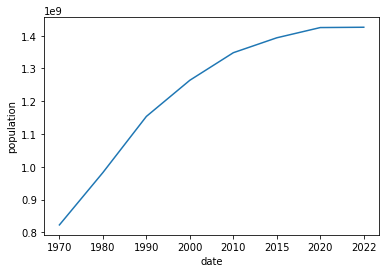

In [16]:
plt.plot(df.loc['CN','2022':'1970'].iloc[::-1])
plt.ylabel("population")
plt.xlabel("date")
plt.show()